In [8]:
from dotenv import load_dotenv
import os
import pyodbc
import pandas as pd
load_dotenv("server.env")
server = os.getenv('DB_SERVER')
database = os.getenv('DB_NAME')
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';Trusted_Connection=yes;')


df = pd.read_sql_query('SELECT * FROM [dbo].[StageTinderData]', conn)
print(df.head())
conn.close()
# print(server)
# print(database)

                                 ID  Sum_App_Opens  No_Of_Days  \
0  00365a51cb920f38e3cbda41ab3135cb              0           0   
1  0054c12d2889e9428e54a3fd06600bd3           4483         319   
2  008c29d66d5975b0127132144576201f           8725         513   
3  00b113ee72d90509f1ae8589044076ee           8438         656   
4  00b74e27ad1cbb2ded8e907fcc49eaaf           6839         477   

   No_Of_Conversations  LongestConversation  LongestConversationInDays  \
0                   12                   78                          3   
1                  159                   43                         70   
2                  162                   48                        200   
3                    0                    0                          0   
4                  739                  133                        684   

   AverageConversationLength  AverageConversationLengthInDays  \
0                      13.17                             0.80   
1                       3.87

C:\Users\my pc\AppData\Local\Temp\ipykernel_18448\2842081252.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query('SELECT * FROM [dbo].[StageTinderData]', conn)


In [14]:
print(df.shape,df.columns)

(1209, 29) Index(['ID', 'Sum_App_Opens', 'No_Of_Days', 'No_Of_Conversations',
       'LongestConversation', 'LongestConversationInDays',
       'AverageConversationLength', 'AverageConversationLengthInDays',
       'MedianConversationLength', 'MedainConversationLengthInDays',
       'No_Of_One_Message_Conversations', 'PercentOfOneMessageConversations',
       'No_Of_GhostingsAfterInitialMessage', 'No_Of_Matches',
       'No_Of_Messages_Sent', 'No_Of_Messages_Received', 'Swipe_Likes',
       'Swipe_Passes', 'BirthDate', 'CreateDate', 'AgeFilterMin',
       'AgeFilterMax', 'Gender', 'InterestedIn', 'Instagram', 'Spotify',
       'JobTitle', 'UserAge', 'EstimatedDurationSinceCreation'],
      dtype='object')


In [16]:
print(df.nunique())

ID                                    1209
Sum_App_Opens                          927
No_Of_Days                             595
No_Of_Conversations                    449
LongestConversation                    356
LongestConversationInDays              394
AverageConversationLength              826
AverageConversationLengthInDays        605
MedianConversationLength                35
MedainConversationLengthInDays         729
No_Of_One_Message_Conversations        246
PercentOfOneMessageConversations       745
No_Of_GhostingsAfterInitialMessage     157
No_Of_Matches                          563
No_Of_Messages_Sent                    867
No_Of_Messages_Received                868
Swipe_Likes                            952
Swipe_Passes                           969
BirthDate                             1071
CreateDate                             879
AgeFilterMin                            20
AgeFilterMax                            46
Gender                                   2
InterestedI

In [17]:
df.isnull().sum()

ID                                     0
Sum_App_Opens                          0
No_Of_Days                             0
No_Of_Conversations                    0
LongestConversation                    0
LongestConversationInDays              0
AverageConversationLength              0
AverageConversationLengthInDays        0
MedianConversationLength               0
MedainConversationLengthInDays         0
No_Of_One_Message_Conversations        0
PercentOfOneMessageConversations       0
No_Of_GhostingsAfterInitialMessage     0
No_Of_Matches                          0
No_Of_Messages_Sent                    0
No_Of_Messages_Received                0
Swipe_Likes                            0
Swipe_Passes                           0
BirthDate                              0
CreateDate                             0
AgeFilterMin                           0
AgeFilterMax                           0
Gender                                 0
InterestedIn                           0
Instagram       

In [28]:
df.loc[df['UserAge'].isnull(),['BirthDate','CreateDate','EstimatedDurationSinceCreation']]

,BirthDate,CreateDate,EstimatedDurationSinceCreation
42,1986-11-30,2020-08-09,1.250000
49,1996-10-12,2020-09-15,1.166666
348,1991-12-06,2020-09-12,1.166666
416,1990-02-25,2019-09-04,2.166666
646,1996-12-11,2018-04-07,3.583333
738,1996-11-11,2015-09-09,6.166666
818,1993-10-06,2021-08-13,0.250000
941,1999-04-26,2014-11-04,7.000000
1136,1995-12-19,2020-08-25,1.250000
1195,1967-01-01,2018-07-02,3.333333


In [29]:
mask = df["UserAge"].isnull()
df.loc[mask, "UserAge"] = df.loc[mask, "CreateDate"].dt.year - df.loc[mask, "BirthDate"].dt.year + df.loc[mask, "EstimatedDurationSinceCreation"]-(df.loc[mask, "CreateDate"].dt.month < df.loc[mask, "BirthDate"].dt.month)   

In [34]:
import numpy as np
df["UserAge"]=np.floor(df["UserAge"]).astype(int)

In [ ]:
male=df.loc[df["Gender"]=="M"]
female=df.loc[df["Gender"]=="F"]

In [48]:
print(male.shape, "and", female.shape,sep="\n")
print("male to female ratio : ", male.shape[0]/female.shape[0] if female.shape[0]!=0 else "inf")

(1059, 29)
and
(150, 29)
male to female ratio :  7.06


In [51]:
male.drop(columns=["Gender"],inplace=True)

C:\Users\my pc\AppData\Local\Temp\ipykernel_18448\2073104683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male.drop(columns=["Gender"],inplace=True)


In [65]:
male["Orientation"] = "HeteroSexual"

C:\Users\my pc\AppData\Local\Temp\ipykernel_18448\3004315740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male["Orientation"] = "HeteroSexual"


In [66]:
orientationMask= male["InterestedIn"]!="F"
male.loc[orientationMask,"Orientation"]="HomoSexual"

<Axes: title={'center': 'Orientation'}, ylabel='count'>

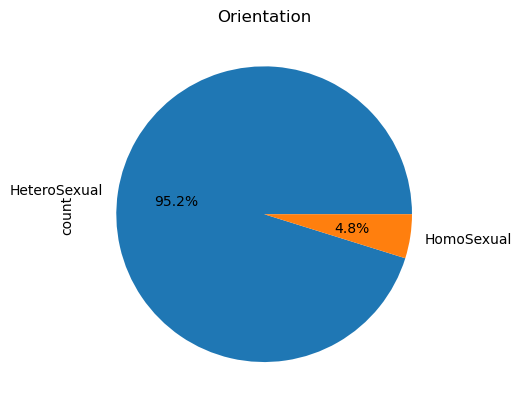

In [76]:
# male["Orientation"].plot(kind="pie",labels=df["Orientation"].unique(),autopct='%1.1f%%', title="Orientation")
male["Orientation"].value_counts().plot(kind="pie",autopct='%1.1f%%',title="Orientation") 

In [67]:
female["Orientation"] = "HeteroSexual"
orientationMask= female["InterestedIn"]!="M"
female.loc[orientationMask,"Orientation"]="HomoSexual"

C:\Users\my pc\AppData\Local\Temp\ipykernel_18448\2097246122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female["Orientation"] = "HeteroSexual"


<Axes: title={'center': 'Orientation'}, ylabel='count'>

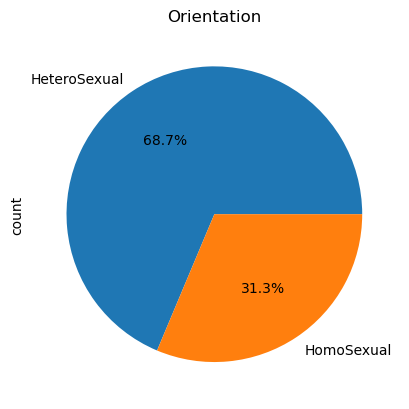

In [80]:
female["Orientation"].value_counts().plot(kind="pie",title="Orientation",autopct='%1.1f%%') 

In [107]:
sMale=male[male["Orientation"]=="HeteroSexual"]

In [108]:
sMale.head()

,ID,Sum_App_Opens,No_Of_Days,No_Of_Conversations,LongestConversation,LongestConversationInDays,AverageConversationLength,AverageConversationLengthInDays,MedianConversationLength,MedainConversationLengthInDays,...,CreateDate,AgeFilterMin,AgeFilterMax,InterestedIn,Instagram,Spotify,JobTitle,UserAge,EstimatedDurationSinceCreation,Orientation
0,00365a51cb920f38e3cbda41ab3135cb,0,0,12,78,3,13.17,0.80,9,0.524780,...,2021-06-07,20,34,F,False,False,unknown,34,0.416666,HeteroSexual
2,008c29d66d5975b0127132144576201f,8725,513,162,48,200,4.51,5.09,2,0.000081,...,2019-08-31,18,30,F,False,True,unknown,22,2.250000,HeteroSexual
3,00b113ee72d90509f1ae8589044076ee,8438,656,0,0,0,0.00,0.00,0,0.000000,...,2018-06-10,18,100,F,False,False,unknown,21,3.416666,HeteroSexual
4,00b74e27ad1cbb2ded8e907fcc49eaaf,6839,477,739,133,684,8.56,10.24,3,0.081134,...,2016-01-01,21,35,F,False,False,unknown,40,5.833333,HeteroSexual
5,00ff275ea954e6564836e1375c31ce25,1856,360,114,59,14,11.06,1.45,7,0.134178,...,2019-12-16,20,24,F,False,True,unknown,19,1.916666,HeteroSexual


In [132]:
sMale.columns

Index(['ID', 'Sum_App_Opens', 'No_Of_Days', 'No_Of_Conversations',
       'LongestConversation', 'LongestConversationInDays',
       'AverageConversationLength', 'AverageConversationLengthInDays',
       'MedianConversationLength', 'MedainConversationLengthInDays',
       'No_Of_One_Message_Conversations', 'PercentOfOneMessageConversations',
       'No_Of_GhostingsAfterInitialMessage', 'No_Of_Matches',
       'No_Of_Messages_Sent', 'No_Of_Messages_Received', 'Swipe_Likes',
       'Swipe_Passes', 'BirthDate', 'CreateDate', 'AgeFilterMin',
       'AgeFilterMax', 'JobTitle', 'UserAge',
       'EstimatedDurationSinceCreation'],
      dtype='object')

In [138]:
sMale.dtypes

ID                                     object
Sum_App_Opens                           int64
No_Of_Days                              int64
No_Of_Conversations                     int64
LongestConversation                     int64
LongestConversationInDays               int64
AverageConversationLength             float64
AverageConversationLengthInDays       float64
MedianConversationLength                int64
MedainConversationLengthInDays        float64
No_Of_One_Message_Conversations         int64
PercentOfOneMessageConversations      float64
No_Of_GhostingsAfterInitialMessage      int64
No_Of_Matches                           int64
No_Of_Messages_Sent                     int64
No_Of_Messages_Received                 int64
Swipe_Likes                             int64
Swipe_Passes                            int64
AgeFilterMin                            int64
AgeFilterMax                            int64
JobTitle                               object
UserAge                           

In [135]:
sMale.drop(sMale[sMale["No_Of_Days"]==0].index,inplace=True)
sMale.drop(columns=["InterestedIn","Orientation","Instagram","Spotify","BirthDate","CreateDate"],inplace=True)

C:\Users\my pc\AppData\Local\Temp\ipykernel_18448\3542386990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sMale.drop(sMale[sMale["No_Of_Days"]==0].index,inplace=True)


KeyError: "['InterestedIn', 'Orientation', 'Instagram', 'Spotify'] not found in axis"

In [114]:
print("Mean Opens: "+str(sMale["Sum_App_Opens"].mean()),
      "Median Opens: "+str(sMale["Sum_App_Opens"].median()),
      "Deviation in Opens: "+str(sMale["Sum_App_Opens"].std()),
      "Maximum Opens: "+str(sMale["Sum_App_Opens"].max()),
      "Minimum Opens: "+str(sMale["Sum_App_Opens"].min()),sep="\n")

Mean Opens: 5772.691358024691
Median Opens: 2688.5
Deviation in Opens: 9619.540929379857
Maximum Opens: 92628
Minimum Opens: 2


In [128]:
print("Correlation Between Sum_App_Opens and No_Of_Matches: "+str(sMale["Sum_App_Opens"].corr(sMale["No_Of_Matches"])))
print("Correlation Between Swipe Likes and No_Of_Matches: "+str(sMale["Swipe_Likes"].corr(sMale["No_Of_Matches"])))
print("Correlation Between User Age and No_Of_Matches: "+str(sMale["UserAge"].corr(sMale["No_Of_Matches"])))
print("Correlation Between AgeFilterMax and No_Of_Matches: "+str(sMale["AgeFilterMax"].corr(sMale["No_Of_Matches"])))
print("Correlation Between AgeFilterMin and No_Of_Matches: "+str(sMale["AgeFilterMin"].corr(sMale["No_Of_Matches"])))


Correlation Between Sum_App_Opens and No_Of_Matches: 0.6615425833432289
Correlation Between Swipe Likes and No_Of_Matches: 0.6871915924856091
Correlation Between User Age and No_Of_Matches: -0.04573758620128353
Correlation Between AgeFilterMax and No_Of_Matches: 0.08664946675811055
Correlation Between AgeFilterMin and No_Of_Matches: -0.11780277657675321


In [146]:
unique_job=sMale["JobTitle"].unique()
print(unique_job)

['unknown' 'Product Engineer' 'Civil Engineer' 'Technical Intern'
 'Consultant' 'Master International Business' 'Developer'
 'Operations Manager' "Master's Student in Computer Science"
 'Entrepreneur' 'Android Developer' 'IT Specialist for System Integration'
 '"Planarkitekt' '"philosophie' 'Computer Science' 'Website Programmeur'
 'Research Assistant' 'History Student' 'Security Officer' 'False'
 'Product Manager' 'Senior Innovation Manager' 'poker player'
 'Swim instructor' 'Receptionist' 'systems engineer' 'Software Developer'
 'Software Engineer' 'Cyber Security Technician' 'Servicedesk'
 'Media Analyst' 'Ingenieur' 'Pfizer Vaccine Distributor' 'Management'
 '30 euros away from collecting bottles' 'Snake Charmer but not really'
 'Engineer' 'Editor' 'Self-Employed' 'Software engineer' 'Researcher'
 'Office Production Assistant' 'Biomedical Engineering Student'
 'Property Management' 'Pharmaceutical Analyst' 'Private Equity'
 'Software developer' 'Hedge Fund Quant Trader'
 'Marketing

In [147]:
job_freq=sMale["JobTitle"].value_counts()
print(job_freq)

JobTitle
unknown                   514
False                      25
Software Engineer          24
Software Developer          7
Student                     6
                         ... 
Med Student                 1
"Engineer                   1
Marketing                   1
Sales                       1
Clinical Social Worker      1
Name: count, Length: 207, dtype: int64


In [149]:
job_stat = sMale.groupby("JobTitle").agg(FreqOfJob=("JobTitle","count"),TotalMatches=("No_Of_Matches","sum"),MeanNoOfMatches=("No_Of_Matches","mean"),MedianNoOfMatches=("No_Of_Matches","median"),MaxNoOfMatches=("No_Of_Matches","max"),MinNoOfMatches=("No_Of_Matches","min"))

In [151]:
job_stat.sort_values(by="TotalMatches",ascending=False,inplace=True)
print(job_stat.head())

                               FreqOfJob  TotalMatches  MeanNoOfMatches  \
JobTitle                                                                  
unknown                              514        303502       590.470817   
Entrepreneur                           4         26551      6637.750000   
Software Developer                     7         17216      2459.428571   
False                                 25         11597       463.880000   
Professional Model and Writer          1         11099     11099.000000   

                               MedianNoOfMatches  MaxNoOfMatches  \
JobTitle                                                           
unknown                                    137.0           22120   
Entrepreneur                              1370.0           23758   
Software Developer                          50.0           13104   
False                                      187.0            3316   
Professional Model and Writer            11099.0           11099  

In [117]:
print(sMale["No_Of_Conversations"].value_counts())

No_Of_Conversations
0        16
4        14
2        14
5        13
23       11
         ..
121       1
12642     1
130       1
142       1
361       1
Name: count, Length: 368, dtype: int64


In [120]:
match_fails=sMale["No_Of_One_Message_Conversations"]+sMale["No_Of_GhostingsAfterInitialMessage"]
match_success=sMale["No_Of_Conversations"]-match_fails
print("Mean Success Matches: "+str(match_success.mean()),
      "Median Success Matches: "+str(match_success.median()),
      "Deviation in Success Matches: "+str(match_success.std()),
      "Maximum Success Matches: "+str(match_success.max()),
      "Minimum Success Matches: "+str(match_success.min()),sep="\n")


Mean Success Matches: 153.4246913580247
Median Success Matches: 45.0
Deviation in Success Matches: 467.0894493072048
Maximum Success Matches: 9363
Minimum Success Matches: 0


In [121]:
swipe_success = sMale["No_Of_Matches"]/(sMale["Swipe_Likes"]+ sMale["Swipe_Passes"])
print("Mean Swipe Success: "+str(swipe_success.mean()),
      "Median Swipe Success: "+str(swipe_success.median()),
      "Deviation in Swipe Success: "+str(swipe_success.std()),
      "Maximum Swipe Success: "+str(swipe_success.max()),
      "Minimum Swipe Success: "+str(swipe_success.min()),sep="\n")

Mean Swipe Success: 0.013349774813131878
Median Swipe Success: 0.006664384802786558
Deviation in Swipe Success: 0.021791461661905456
Maximum Swipe Success: 0.275
Minimum Swipe Success: 0.0


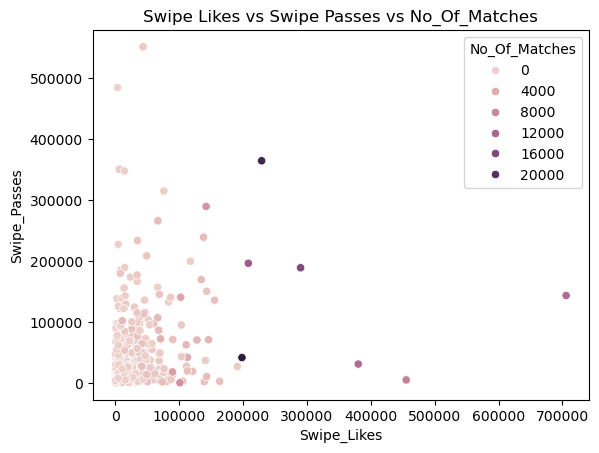

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=sMale,x="Swipe_Likes",y="Swipe_Passes",hue="No_Of_Matches")
plt.title("Swipe Likes vs Swipe Passes vs No_Of_Matches")
plt.show()

In [ ]:
sMale["launchPerDay"]=sMale.apply(lambda x: x["Sum_App_Opens"]/x["No_Of_Days"],axis=1)
sMale["LikelyDateConversationRatio"]=sMale.apply(lambda x: x["LongestConversation"]/x["No_Of_Conversations"] if x["No_Of_Conversations"]!=0 else 0,axis=1)
sMale["FailedMatches"]=sMale["No_Of_One_Message_Conversations"]+sMale["No_Of_GhostingsAfterInitialMessage"]
sMale["SuccessMatches"]=sMale["No_Of_Conversations"]-sMale["FailedMatches"]
sMale["SuccessMatchRatio"]=sMale.apply(lambda x: x["SuccessMatches"]/x["No_Of_Conversations"] if x["No_Of_Conversations"]!=0 else 0,axis=1)
sMale["MatchRatio"]=sMale.apply(lambda x: x["No_Of_Matches"]/x["Swipe_Likes"] if x["Swipe_Likes"]!=0 else 0,axis=1)